In [3]:
%%capture
import os
import sys
import random
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
try:
    from imutils import paths
except ImportError:
    !pip install imutils
    from imutils import paths
    
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# ea
train_df = pd.read_csv("train.csv") 
test_df = pd.read_csv("test.csv") 
print(train_df.head(5))

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [7]:
diagnosis = list(train_df.diagnosis.unique())
print(diagnosis)

[2, 4, 1, 0, 3]


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64


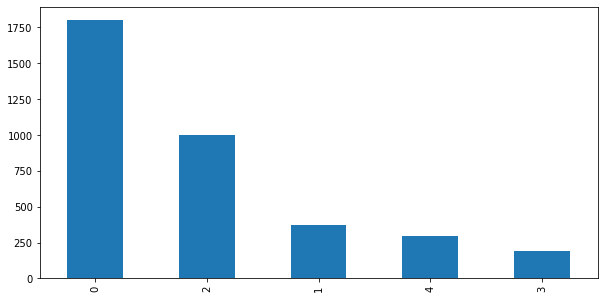

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
counts = train_df["diagnosis"].value_counts()
print(counts)
counts.plot(kind='bar', ax=ax1)

In [38]:
# get random images from each class and display
columns = 3
classes = {
    "zero": list(train_df.loc[train_df["diagnosis"] == 0].sample(n=columns).id_code),
    "one": list(train_df.loc[train_df["diagnosis"] == 1].sample(n=columns).id_code),
    "two": list(train_df.loc[train_df["diagnosis"] == 2].sample(n=columns).id_code),
    "three": list(train_df.loc[train_df["diagnosis"] == 3].sample(n=columns).id_code),
    "four": list(train_df.loc[train_df["diagnosis"] == 4].sample(n=columns).id_code)
}
"""
zero = train_df.loc[train_df["diagnosis"] == 0].sample(n=columns)
zero.name = "0"
one = train_df.loc[train_df["diagnosis"] == 1].sample(n=columns)
one.name = "1"
two = train_df.loc[train_df["diagnosis"] == 2].sample(n=columns)
two.name = "2"
three = train_df.loc[train_df["diagnosis"] == 3].sample(n=columns)
three.name = "3"
four = train_df.loc[train_df["diagnosis"] == 4].sample(n=columns)
four.name = "4"
"""
print(classes)

{'zero': ['054b1b305160', '152db3de8120'], 'one': ['13ab8db8c700', 'a8c54e2a4b79'], 'two': ['03fd50da928d', '54cab3596214'], 'three': ['b3d135bd3bb5', 'aea59ebec445'], 'four': ['080ee76c958c', 'ed246ae1ed08']}


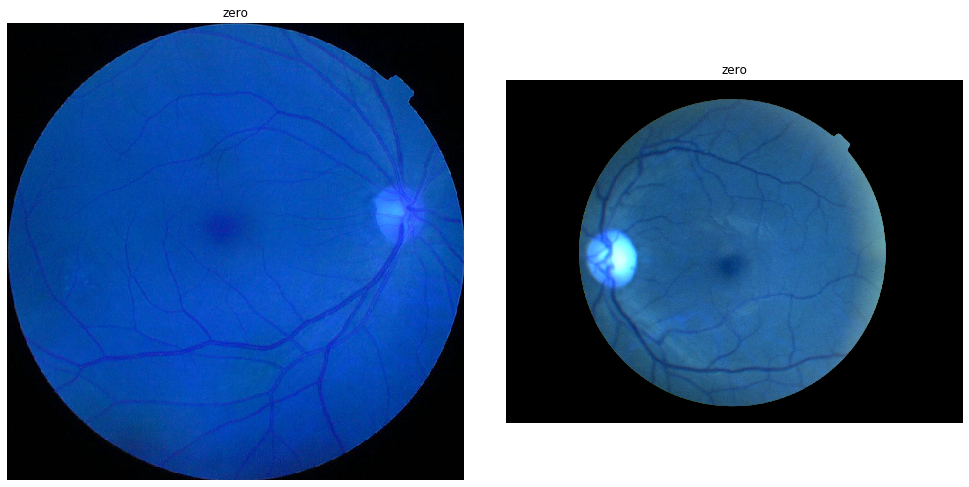

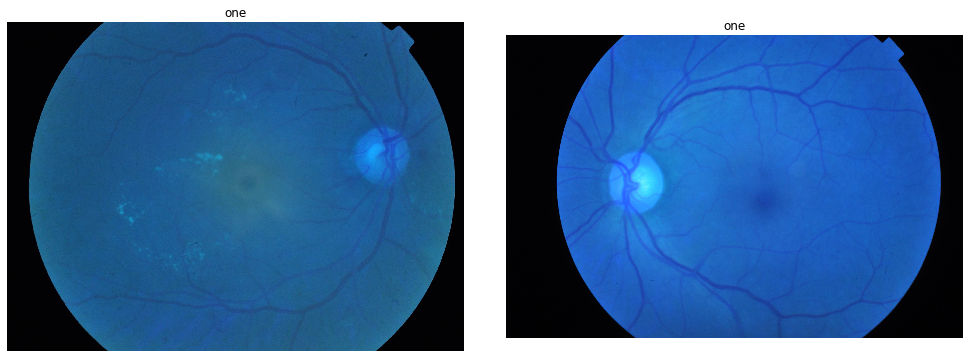

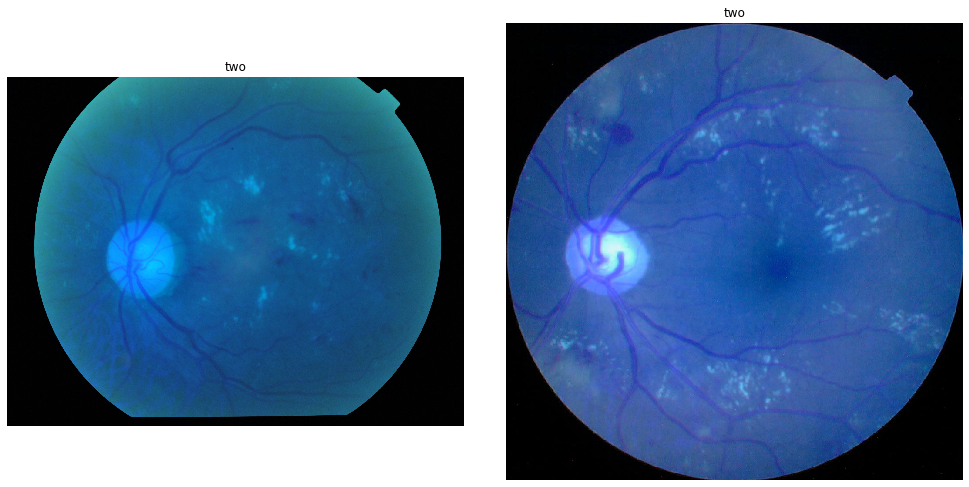

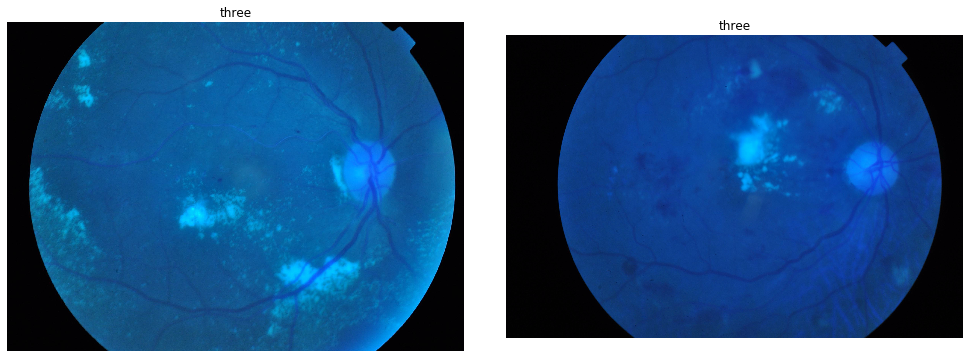

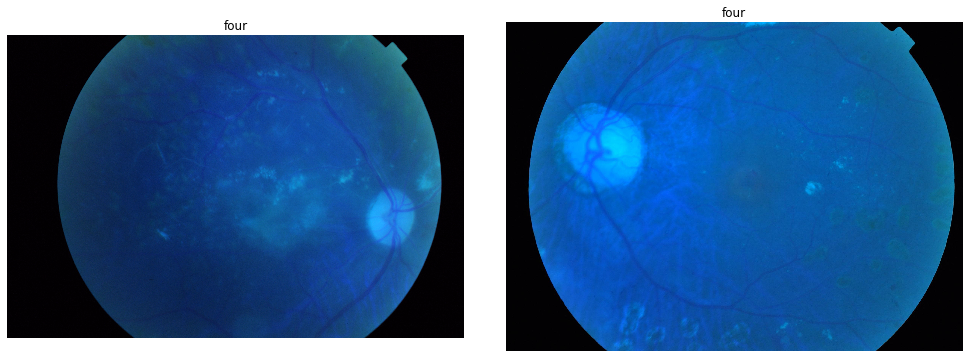

In [40]:
# this method displays images for two classes above and below
def display(classes, columns, cmap=None):
    for _class in classes:
        #print(random_images)
        fig, axes = plt.subplots(nrows=1, ncols=columns, figsize=(14, 10), squeeze=False)
        fig.tight_layout()
        for l in range(1):
            for m, img in enumerate(classes[_class]):
                image = cv2.imread("train_images/{}.png".format(img))
                axes[l][m].imshow(image, cmap=cmap)
                axes[l][m].axis("off")
                axes[l][m].set_title(_class)
    # done displaying
    
# display images
display(classes, columns)